In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
print(torch.__version__)

1.6.0


-45.0 0.09 1001.0 0.0 3.0 1.0 2.0
(4, 1001)


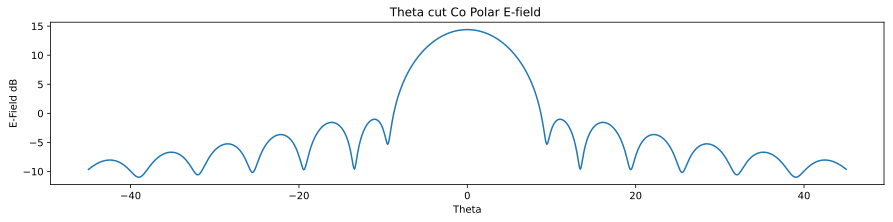

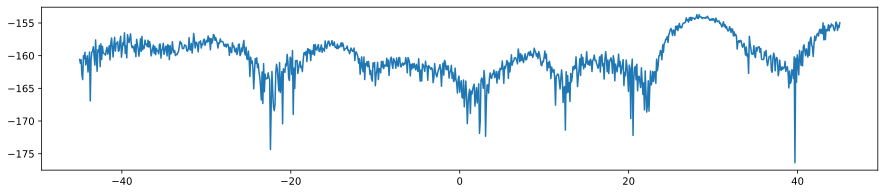

In [18]:

filename = 'Documents/GitHub/Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction/Prelimary Data Analysis/Single Reflector Settings and Field Cuts for Niels/cut_files/1.cut'
V_INI, V_INC, V_NUM, C, ICOMP, ICUT, NCOMP = np.genfromtxt(filename, max_rows=1, skip_header=1)
print(V_INI, V_INC, V_NUM, C, ICOMP, ICUT, NCOMP)
data = np.genfromtxt(filename, skip_header=2,dtype = np.float32).T
print(data.shape)


thetas = np.linspace(-45.0, 45.0, int(V_NUM))
copolar = np.sqrt(data[0]**2 + data[1]**2)
xpolar = np.sqrt(data[2]**2 + data[3]**2)
copolar_dB = 10*np.log10(copolar)
xpolar_dB = 10*np.log10(xpolar)
plt.figure(figsize=(15,3))
plt.plot(thetas, copolar_dB)
plt.title('Theta cut Co Polar E-field ')
plt.xlabel('Theta')
plt.ylabel('E-Field dB')
plt.show()

plt.figure(figsize=(15, 3))
plt.plot(thetas, xpolar_dB)
plt.show()


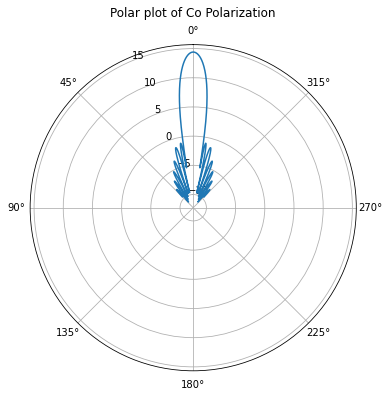

In [4]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(25, 6))
ax.plot(thetas*np.pi/180, copolar)

ax.set_theta_zero_location('N')
ax.grid(True)

ax.set_title("Polar plot of Co Polarization", va='bottom')
plt.show()

In [ ]:
## Load 

In [62]:
## Load parameter file
parameterFilename = 'Documents/GitHub/Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction/Prelimary Data Analysis/Single Reflector Settings and Field Cuts for Niels/log_files/lookup.log'

parameters = np.genfromtxt(parameterFilename, skip_header=2)

print(parameters[-1,0])
print(parameters.shape[0])


2499.0
2499


In [81]:
## Load all data files


dataset =np.array([])
for i in range(10):
    filename =  'Documents/GitHub/Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction/Prelimary Data Analysis/Single Reflector Settings and Field Cuts for Niels/cut_files/'+str(i)+'.cut'
    dataset = np.append(dataset,np.genfromtxt(filename, skip_header=2).T)


    
print(dataset[1])

from torch.utils.data import DataLoader





dataloader = DataLoader()



-0.03586421611


TypeError: __init__() missing 1 required positional argument: 'dataset'

In [153]:

NN = 10;
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.regressor = nn.Sequential(nn.Linear(3, NN),
                                       nn.Tanh(),
                                       nn.Linear(NN, int(V_NUM)))
        
    def forward(self, x):
        output = self.regressor(x)
        return output

    
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
    
## Make forward pass
net = Net()
net.apply(init_weights)
t_data = torch.Tensor([+4.1666666667E-02,5.7777777778E-01,0.0000000000E+00])
print(net(t_data))

loss = criterion(input = net(t_data), target = torch.from_numpy(copolar))
print(loss)


tensor([-0.0600, -0.3870,  0.2315,  ...,  0.3835,  0.0873,  0.1470],
       grad_fn=<AddBackward0>)
tensor(63.7701, grad_fn=<MseLossBackward>)


tensor(63.7701, grad_fn=<MseLossBackward>)
tensor(53.4477, grad_fn=<MseLossBackward>)
tensor(42.3756, grad_fn=<MseLossBackward>)
tensor(31.6692, grad_fn=<MseLossBackward>)
tensor(22.3436, grad_fn=<MseLossBackward>)
tensor(14.9369, grad_fn=<MseLossBackward>)
tensor(9.7680, grad_fn=<MseLossBackward>)
tensor(6.7370, grad_fn=<MseLossBackward>)
tensor(5.4798, grad_fn=<MseLossBackward>)
tensor(5.7379, grad_fn=<MseLossBackward>)


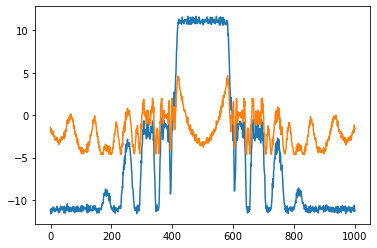

In [154]:
## Overfitting on single E field

LEARNING_RATE = 1e-5;
EPOCHS = int(1e5);


criterion = torch.nn.MSELoss() # Mean squared error
optimizer = torch.optim.AdamW(net.parameters(),lr = LEARNING_RATE)

for epoch in range(EPOCHS):
    
    out = net(t_data)
    
    loss = criterion(input = out, target = torch.from_numpy(copolar))
    #Gradients
    loss.backward()
    #Step Optimizer
    optimizer.step()
    if epoch%(EPOCHS/10) == 0:
        print(loss)


plt.figure()
plt.plot(net(t_data).detach().numpy())
plt.plot(net(t_data).detach().numpy()-copolar)


1001


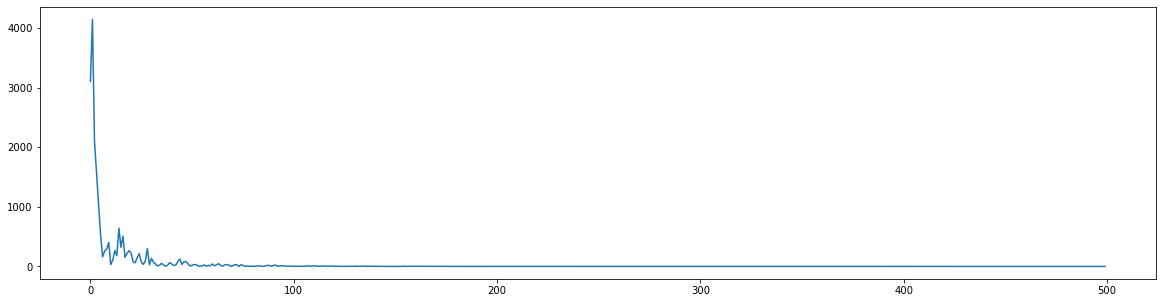